# Import data from kaggle via API

## Libraries and settings

In [467]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# API credentials for Kaggle
with open('kaggle.json') as f:
    data = json.load(f)

os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

from kaggle.api.kaggle_api_extended import KaggleApi

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/project_arm_airbnb/data_kaggle


## Use Kaggle Web API to download airbnb data for Geneva

In [468]:
# Initialize API
api = KaggleApi()
api.authenticate()

# Download file
api.dataset_download_file('prayankkul/airbnb-geneva-switzerland-29-jun-2021', path='.', file_name='listings_1.csv')

Dataset URL: https://www.kaggle.com/datasets/prayankkul/airbnb-geneva-switzerland-29-jun-2021


True

In [469]:
# Read zip file data to pandas data frame
# path to the zip file
zip_file_path = '/workspaces/project_arm_airbnb/data_kaggle/listings_1.csv.zip'

# Entpacken der ZIP-Datei
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/workspaces/project_arm_airbnb/data_kaggle')

# Lesen der entpackten CSV-Datei in ein Pandas DataFrame
csv_file_path = '/workspaces/project_arm_airbnb/data_kaggle/listings_1.csv'
df = pd.read_csv(csv_file_path)

# Anzeigen des DataFrames
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42515,https://www.airbnb.com/rooms/42515,20210629025133,2021-06-29,Geneva center - Hosting females,<b>The space</b><br />This is a private room w...,NaN,https://a0.muscache.com/pictures/10640277/ff1d...,185647,https://www.airbnb.com/users/show/185647,...,4.78,4.79,4.40,NaN,f,1,0,1,0,1.20
1,44959,https://www.airbnb.com/rooms/44959,20210629025133,2021-06-29,Perfect Cozy Bedroom Close to Lake & Transport,Perfect for the single traveler whether it be ...,The apartment is situated in the heart of Gene...,https://a0.muscache.com/pictures/3340619/139f4...,198343,https://www.airbnb.com/users/show/198343,...,5.00,4.72,4.57,NaN,f,1,0,1,0,0.67
2,194110,https://www.airbnb.com/rooms/194110,20210629025133,2021-06-29,Central apartment by the lake,Design apartment conveniently located in the h...,NaN,https://a0.muscache.com/pictures/1252014/0ee91...,942248,https://www.airbnb.com/users/show/942248,...,4.49,4.85,4.49,NaN,f,1,1,0,0,0.67
3,276025,https://www.airbnb.com/rooms/276025,20210629025133,2021-06-29,Lovely flat by Geneva lake,This cozy flat is located in a very pleasant v...,NaN,https://a0.muscache.com/pictures/4156456/d3aed...,1442438,https://www.airbnb.com/users/show/1442438,...,4.87,4.75,4.68,NaN,t,1,1,0,0,1.15
4,325986,https://www.airbnb.com/rooms/325986,20210629025133,2021-06-29,"Stylish loft in Pâquis, next to UN",Hello traveler!<br />Pâquis is one of the most...,NaN,https://a0.muscache.com/pictures/21414234/10b5...,1667362,https://www.airbnb.com/users/show/1667362,...,4.93,4.76,4.65,NaN,f,1,1,0,0,1.01


In [470]:
# delete zip file
if os.path.exists(zip_file_path):
    os.remove(zip_file_path)
    print(f"{zip_file_path} wurde gelöscht.")
else:
    print(f"{zip_file_path} existiert nicht.")

/workspaces/project_arm_airbnb/data_kaggle/listings_1.csv.zip wurde gelöscht.


# Data preparation

In [471]:
# create a subset of the data with the columns we are interested in for the analysis
# select columns: 'id', 'neighbourhood_cleansed', 'latitude', 'longitude','property_type', 'room_type', 'price', 'accomodates', 'bathrooms_text', 'amenities', 'review_scores_rating', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count'
df = df[['id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'price', 'accommodates', 'bathrooms_text', 'amenities', 'review_scores_rating', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count']]
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,$72.00,1,1.5 baths,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,$68.00,1,1.5 shared baths,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,$135.00,4,1 bath,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,$65.00,5,1 bath,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,$150.00,2,1.5 baths,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [472]:
# print shape of the data
print(f"Dataframe shape: {df.shape}")

# print number of columns and rows
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Dataframe shape: (2069, 14)
Number of rows: 2069
Number of columns: 14


### Check for hotels in data

In [473]:
# unique values of the property_type column
property_types = df['property_type'].unique()
print(property_types)

# count the number of listings for each property type
property_type_counts = df['property_type'].value_counts()
print(property_type_counts)

['Private room in apartment' 'Entire apartment' 'Private room in loft'
 'Private room in condominium' 'Entire loft' 'Private room in villa'
 'Entire condominium' 'Private room in house' 'Entire house'
 'Entire villa' 'Private room in bed and breakfast' 'Entire guesthouse'
 'Entire place' 'Entire bungalow' 'Shared room in loft'
 'Entire serviced apartment' 'Shared room in apartment'
 'Entire guest suite' 'Room in hotel' 'Entire bed and breakfast'
 'Private room in nature lodge' 'Private room in townhouse'
 'Private room in casa particular' 'Room in boutique hotel'
 'Entire townhouse' 'Tiny house' 'Shared room'
 'Private room in guesthouse' 'Yurt' 'Private room in hostel' 'Boat'
 'Private room in chalet' 'Farm stay' 'Shared room in condominium'
 'Room in aparthotel' 'Private room in guest suite' 'Camper/RV'
 'Private room in tiny house' 'Houseboat' 'Bus'
 'Private room in serviced apartment' 'Private room' 'Entire cottage']
property_type
Entire apartment                      1084
Private

In [474]:
# Only include property types of private indivduals and exclude professional / commercial property types 
# exclude property types with hotel or hostel in the name
df = df[~df['property_type'].str.contains('Hotel|Hostel|hotel|hostel')]
df['property_type'].value_counts()

property_type
Entire apartment                      1084
Private room in apartment              435
Entire serviced apartment              111
Entire condominium                      89
Private room in house                   71
Entire house                            41
Private room in condominium             31
Entire loft                             19
Private room in bed and breakfast       19
Private room in villa                   16
Private room in townhouse               12
Shared room in apartment                11
Private room in casa particular         10
Entire villa                            10
Private room in loft                     9
Entire guesthouse                        9
Entire townhouse                         7
Boat                                     6
Entire guest suite                       5
Private room in serviced apartment       5
Tiny house                               3
Farm stay                                2
Private room in nature lodge            

In [475]:
# print shape of the data
print(f"Dataframe shape: {df.shape}")

# print number of columns and rows
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataframe shape: (2024, 14)
Number of rows: 2024
Number of columns: 14


### Exlude property types with less than 5 listings

In [476]:
# exclude property types with less than 5 listings to avoid outliers
df = df.groupby('property_type').filter(lambda x: len(x) > 4)
df['property_type'].value_counts()

property_type
Entire apartment                      1084
Private room in apartment              435
Entire serviced apartment              111
Entire condominium                      89
Private room in house                   71
Entire house                            41
Private room in condominium             31
Private room in bed and breakfast       19
Entire loft                             19
Private room in villa                   16
Private room in townhouse               12
Shared room in apartment                11
Private room in casa particular         10
Entire villa                            10
Private room in loft                     9
Entire guesthouse                        9
Entire townhouse                         7
Boat                                     6
Entire guest suite                       5
Private room in serviced apartment       5
Name: count, dtype: int64

### Conversion of variables 'price' and 'bathrooms' to floats

In [477]:
# convert price to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5 baths,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5 shared baths,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1 bath,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1 bath,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5 baths,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [478]:
# drop in bathrooms_text all text that starts with b or s
df['bathrooms_text'] = df['bathrooms_text'].str.replace(r'[^0-9.]+', '', regex=True)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [479]:
# convert bathrooms_text to float and set 1 for NaN and missing values
df['bathrooms_text'] = df['bathrooms_text'].replace('', np.nan).fillna(1).astype(float)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms_text,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


In [480]:
# rename bathrooms_text to bathrooms
df.rename(columns={'bathrooms_text': 'bathrooms'}, inplace=True)
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,f,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,f,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,f,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,t,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,f,1


### Conversion of variable 'instant_bookable' to dummy

In [481]:
# convert vriable instant_bookable to dummy variable with 1 for True and 0 for False
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})
df.head()

,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1


### Summary statistics and missing values

In [482]:
# describe the data
# print the summary statistics of the data
print(df.describe())


                 id     latitude    longitude        price  accommodates  \
count  2.000000e+03  2000.000000  2000.000000  2000.000000   2000.000000   
mean   2.993687e+07    46.206250     6.143968   124.940000      2.657000   
std    1.530981e+07     0.020207     0.027521   117.992489      1.506149   
min    4.251500e+04    46.138820     5.973220    10.000000      1.000000   
25%    1.721386e+07    46.195453     6.132590    71.000000      2.000000   
50%    3.307640e+07    46.204425     6.144250    99.000000      2.000000   
75%    4.308626e+07    46.212553     6.155158   133.250000      4.000000   
max    5.069686e+07    46.346590     6.266060  2300.000000     11.000000   

         bathrooms  review_scores_rating  review_scores_location  \
count  2000.000000           1509.000000             1488.000000   
mean      1.202750              4.616885                4.781438   
std       0.498891              0.738903                0.441723   
min       0.000000              0.000000   

In [483]:
# shape of the data
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().values.sum()}")
print(f"Unique values: {df.nunique()}")
print(f"Data types: {df.dtypes}")


Rows: 2000
Columns: 14
Missing values: 1003
Unique values: id                                2000
neighbourhood_cleansed              41
latitude                          1659
longitude                         1710
property_type                       20
room_type                            3
price                              250
accommodates                        11
bathrooms                           11
amenities                         1855
review_scores_rating               105
review_scores_location              78
instant_bookable                     2
calculated_host_listings_count      19
dtype: int64
Data types: id                                  int64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
price                             float64
accommodates                        int64
bathrooms                         

In [484]:
# check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

review_scores_rating      491
review_scores_location    512
dtype: int64

In [485]:
# replace missing values in review_scores_rating and review_scores_location with the mean
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())
df['review_scores_location'] = df['review_scores_location'].fillna(df['review_scores_location'].mean())

# check for missing values or NaN values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [486]:
# check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Number of duplicates: 0


In [487]:
# shape of the data
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(f"Missing values: {df.isnull().sum().values.sum()}")
print(f"Unique values: {df.nunique()}")

Rows: 2000
Columns: 14
Missing values: 0
Unique values: id                                2000
neighbourhood_cleansed              41
latitude                          1659
longitude                         1710
property_type                       20
room_type                            3
price                              250
accommodates                        11
bathrooms                           11
amenities                         1855
review_scores_rating               106
review_scores_location              79
instant_bookable                     2
calculated_host_listings_count      19
dtype: int64


# EDA

### Summary statistics

In [488]:
# summary statistics of the data
summary_statistics = df.describe(include='all')
summary_statistics


,id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count
count,2.000000e+03,2000,2000.000000,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,41,NaN,NaN,20,3,NaN,NaN,NaN,1855,NaN,NaN,NaN,NaN
top,NaN,Commune de Genève,NaN,NaN,Entire apartment,Entire home/apt,NaN,NaN,NaN,"[""Wifi"", ""Dedicated workspace"", ""Cooking basic...",NaN,NaN,NaN,NaN
freq,NaN,1374,NaN,NaN,1084,1381,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN
mean,2.993687e+07,NaN,46.206250,6.143968,NaN,NaN,124.940000,2.657000,1.202750,NaN,4.616885,4.781438,0.348500,10.726500
std,1.530981e+07,NaN,0.020207,0.027521,NaN,NaN,117.992489,1.506149,0.498891,NaN,0.641774,0.380977,0.476614,25.444438
min,4.251500e+04,NaN,46.138820,5.973220,NaN,NaN,10.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000
25%,1.721386e+07,NaN,46.195453,6.132590,NaN,NaN,71.000000,2.000000,1.000000,NaN,4.616885,4.781438,0.000000,1.000000
50%,3.307640e+07,NaN,46.204425,6.144250,NaN,NaN,99.000000,2.000000,1.000000,NaN,4.670000,4.781438,0.000000,1.000000
75%,4.308626e+07,NaN,46.212553,6.155158,NaN,NaN,133.250000,4.000000,1.000000,NaN,4.940000,5.000000,1.000000,3.000000


### Neighborhood

In [489]:
# print the number of listings in each neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève     1374
Carouge                 93
Grand-Saconnex          56
Vernier                 52
Lancy                   48
Thônex                  43
Chêne-Bougeries         40
Versoix                 34
Meyrin                  33
Cologny                 26
Onex                    24
Pregny-Chambésy         21
Veyrier                 16
Plan-les-Ouates         15
Chêne-Bourg             14
Collonge-Bellerive      14
Bellevue                12
Puplinge                 8
Bernex                   7
Genthod                  7
Bardonnex                7
Corsier                  6
Satigny                  5
Collex-Bossy             5
Confignon                5
Meinier                  4
Soral                    4
Troinex                  3
Avully                   3
Anières                  3
Hermance                 3
Vandoeuvres              2
Presinge                 2
Dardagny                 2
Chancy                   2
Choulex                  2
Perly

In [490]:
# list the 5 most common neighborhoods and summarize the others as 'Other'
top_5_neighborhoods = neighborhood_counts.head(5).index
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighborhoods else 'Other')
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève    1374
Other                 377
Carouge                93
Grand-Saconnex         56
Vernier                52
Lancy                  48
Name: count, dtype: int64


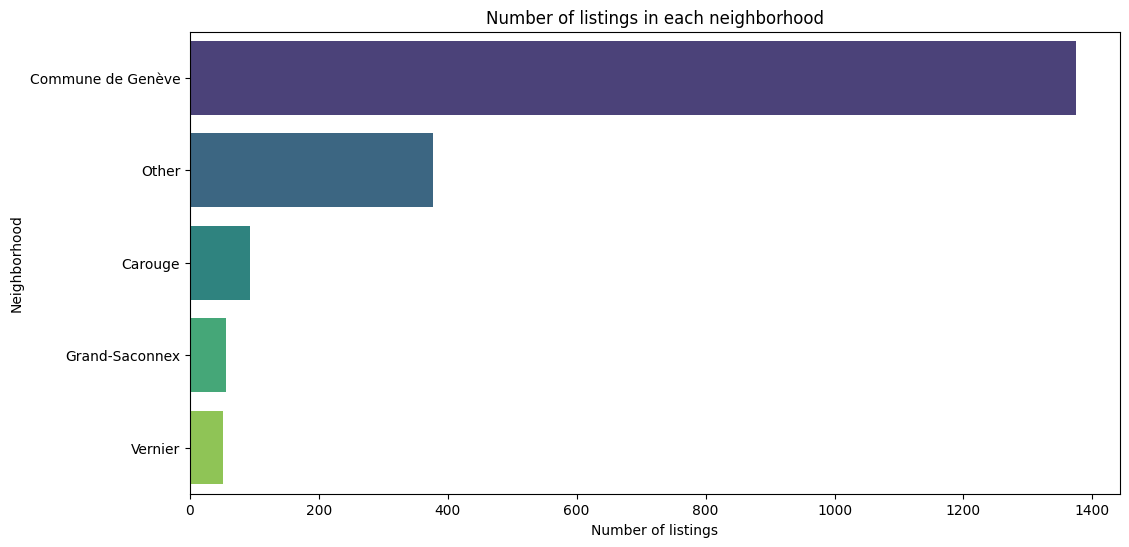

In [491]:
# plot the numnber of the neighbourhood_cleansed column and only show neighbourhoods with more than 50 listings, sorted by the number of listings, create a category 'Others' that sums up the listings of neighbourhoods with less than 50 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='neighbourhood_cleansed', order=neighborhood_counts[neighborhood_counts > 50].index, palette='viridis')
plt.title('Number of listings in each neighborhood')
plt.xlabel('Number of listings')
plt.ylabel('Neighborhood')
plt.show()

### Property types

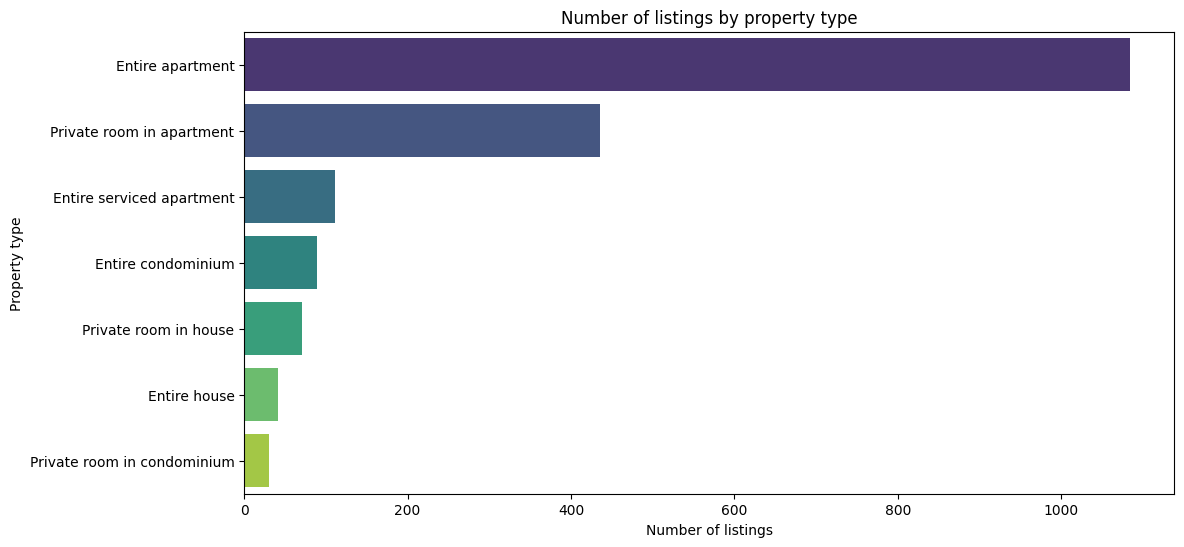

In [492]:
# plot the number of listings depending on the property type and only include property types with more than 25 listings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts()[df['property_type'].value_counts() > 25].index, palette='viridis')
plt.title('Number of listings by property type')
plt.xlabel('Number of listings')
plt.ylabel('Property type')
plt.show()

### Room types

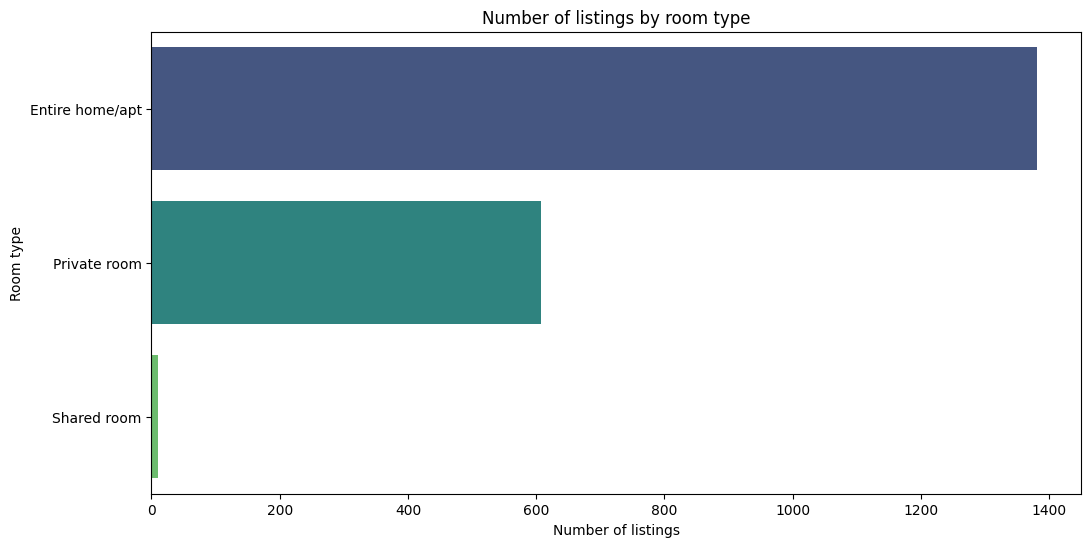

In [493]:
# plot the number of listings depending on the room type and order it by count 
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='room_type', order=df['room_type'].value_counts().index, palette='viridis')
plt.title('Number of listings by room type')
plt.xlabel('Number of listings')
plt.ylabel('Room type')
plt.show()


### Histogram of 'price'

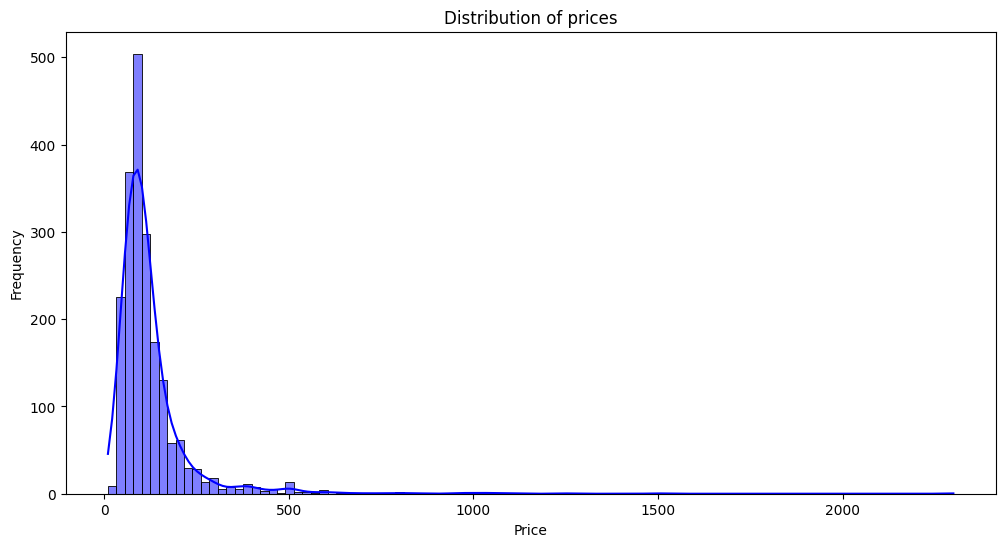

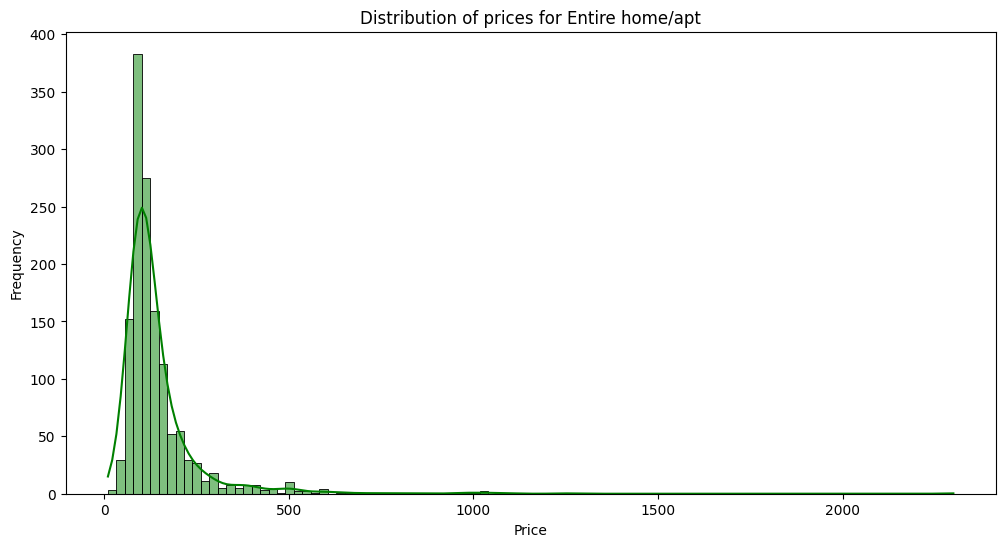

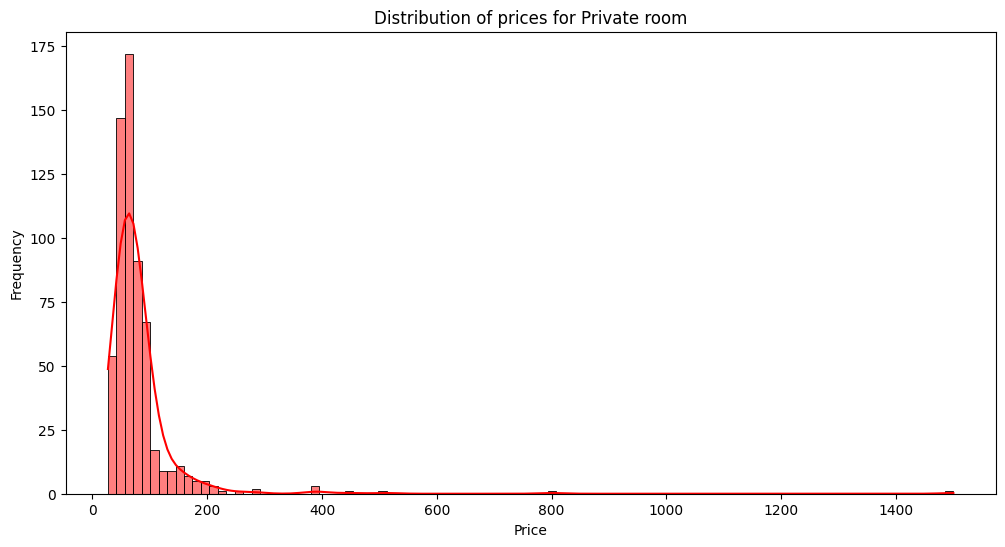

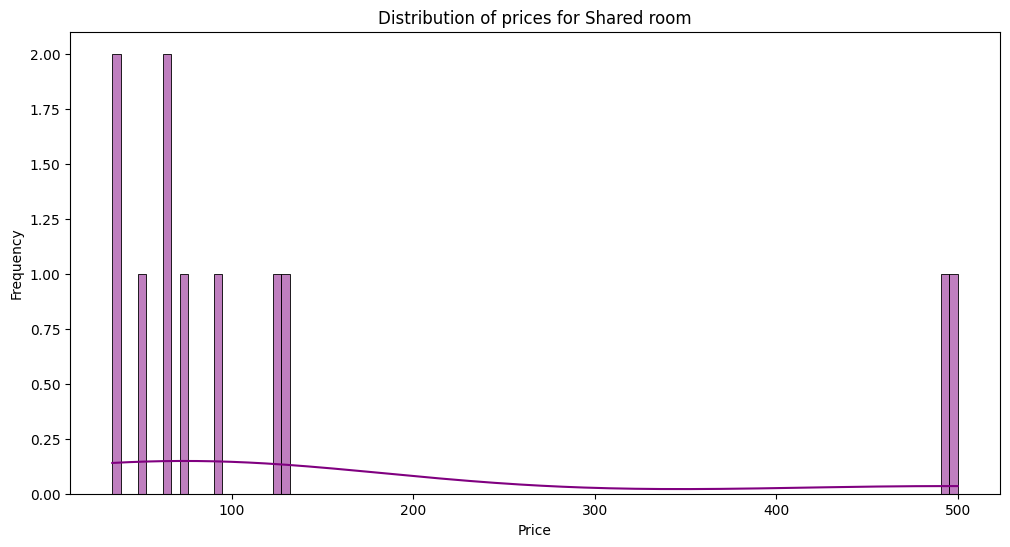

In [494]:
# plot the distribution of the price column
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=100, color='blue', kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Entire home/apt'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Entire home/apt']['price'], bins=100, color='green', kde=True)
plt.title('Distribution of prices for Entire home/apt')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Private room'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Private room']['price'], bins=100, color='red', kde=True)
plt.title('Distribution of prices for Private room')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# plot the distribution of the price column for listings of the room_type 'Shared room'
plt.figure(figsize=(12, 6))
sns.histplot(df[df['room_type'] == 'Shared room']['price'], bins=100, color='purple', kde=True)
plt.title('Distribution of prices for Shared room')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Histogram of 'accomodates'

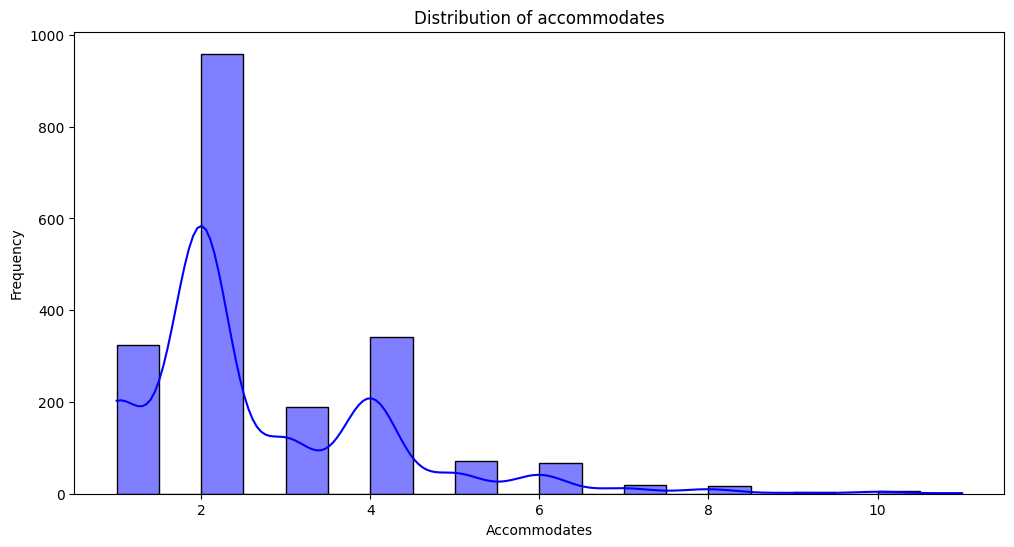

In [495]:
# create a histogram of the number of people that can be accommodated in the listings
plt.figure(figsize=(12, 6))
sns.histplot(df['accommodates'], bins=20, color='blue', kde=True)
plt.title('Distribution of accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()